<a href="https://colab.research.google.com/github/Priyadarshini-yadav13/priya13/blob/main/Linear_Regression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Getting an idea about the duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
# The above data tells us that there is 1 duplicate row in the dataset

In [ ]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Getting an idea about the duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Now, there are no duplicates in the data

In [ ]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
# We can see that all the columns are in expected data types

In [ ]:
# Doubt -> How to get the duplicate row
df[df.duplicated()]

In [ ]:
# Getting an idea about NULL values
df.isnull().sum().any()

np.False_

In [ ]:
# False means that there are no NULL values in the data

In [ ]:
# If you get True in the above block of code ->
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# Getting an idea about the shape of the data
print('Shape :', df.shape)
print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Shape : (1337, 7)
Rows : 1337
Columns : 7


In [ ]:
# There are 1337 rows and 7 columns in the data.

In [ ]:
# Statistical Analysis
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
'''
(1) From the "age" column, we can see that mean and median
are approximately same which means that the data is symmetric.
We have people in the range of 18 to 64
(2) From the "bmi" column, we can see that mean and median
are approximately same which means that the data is symmetric.
(3) From the "children" column, we can see that mean and median
are approximately same which means that the data is symmetric.
We have childrens in the range of 0 to 5
(4) From the "charges" column, we can see that mean is significantly greater than
median implying that there are outiers in right tail.
'''

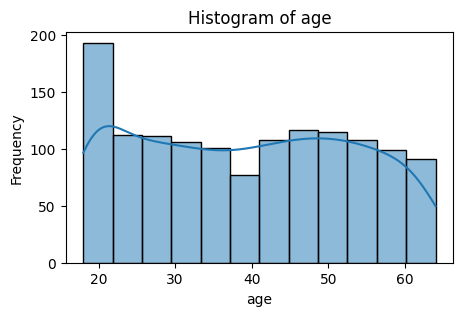

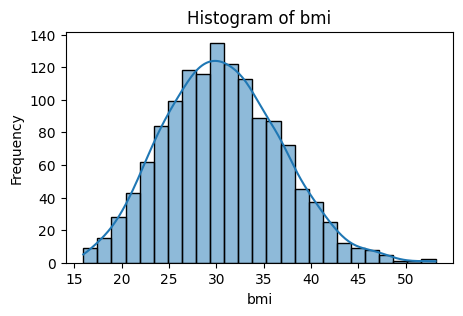

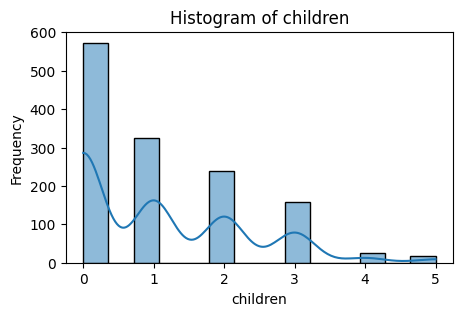

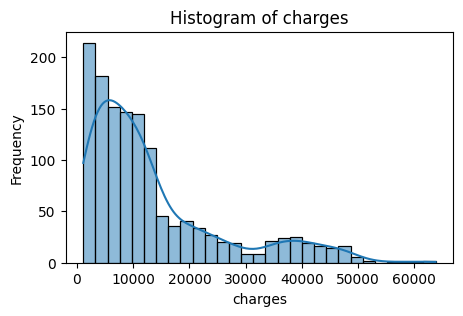

In [ ]:
# Histogram for numeric columns
for col in df.select_dtypes(include = np.number):
  plt.figure(figsize = (5, 3))
  sns.histplot(df[col], kde = True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
'''
Conclusions ->
(1) From the histogram of "age" column, we can see that
we have maximum people from age 18-22 and the remaining age groups
have almost same number of people.
(2) From the histogram of "bmi" column,
we can see that we the distribution is normal.
(3) From the histogram of "children" column,
we can say that as the number of children increases,
the frequency of people decreases.
(4) From the histogram of "charges" column, we can say that it follows an exponentially
decreasing curve
'''

In [ ]:
# help() ->
help(df.select_dtypes)

Help on method select_dtypes in module pandas.core.frame:

select_dtypes(include=None, exclude=None) -> 'Self' method of pandas.core.frame.DataFrame instance
    Return a subset of the DataFrame's columns based on the column dtypes.
    
    Parameters
    ----------
    include, exclude : scalar or list-like
        A selection of dtypes or strings to be included/excluded. At least
        one of these parameters must be supplied.
    
    Returns
    -------
    DataFrame
        The subset of the frame including the dtypes in ``include`` and
        excluding the dtypes in ``exclude``.
    
    Raises
    ------
    ValueError
        * If both of ``include`` and ``exclude`` are empty
        * If ``include`` and ``exclude`` have overlapping elements
        * If any kind of string dtype is passed in.
    
    See Also
    --------
    DataFrame.dtypes: Return Series with the data type of each column.
    
    Notes
    -----
    * To select all *numeric* types, use ``np.number`` or

In [ ]:
# Doubt ->
df.select_dtypes(include = np.number)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


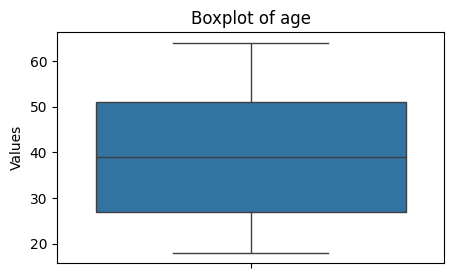

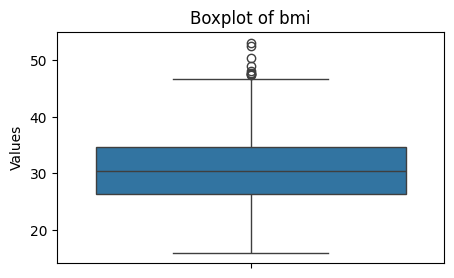

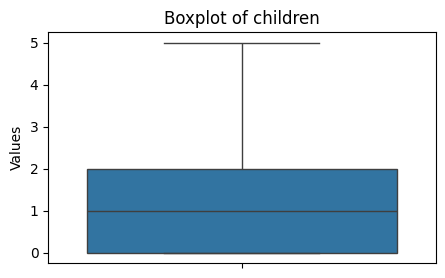

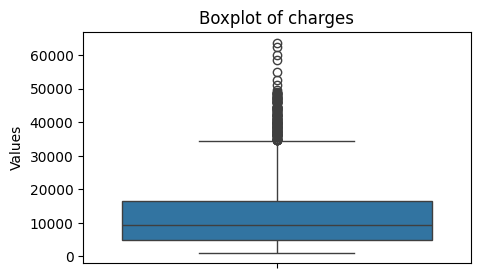

In [ ]:
# Boxplots for all the numerical columns
for col in df.select_dtypes(include = np.number):
  plt.figure(figsize = (5, 3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.ylabel('Values')
  plt.show()

In [ ]:
'''
Conclusions ->
(1) From the above plots, we can see that
"age" and "children" columns are not having outliers.
(2) From the above plots, we can see that
"bmi" and "charges" columns are having outliers
have outliers in right tail.
'''

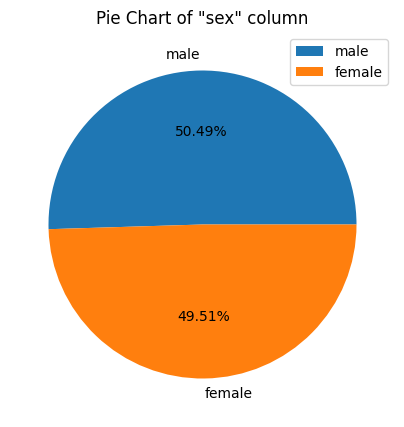

In [ ]:
# Pie Chart for "sex" column
counts = df['sex'].value_counts()

# Pie Chart
plt.figure(figsize = (5, 5))
plt.pie(counts, labels = counts.index, autopct = '%.2f%%')
plt.title('Pie Chart of "sex" column')
plt.legend()
plt.show()

In [ ]:
# We have almost equal amount of data from "male" and "female" gender

In [ ]:
# Doubts ->
df['sex'].value_counts()

,count
sex,
male,675
female,662


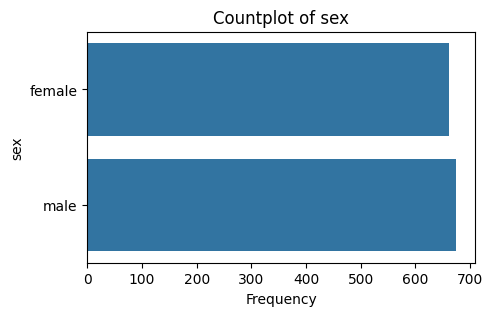

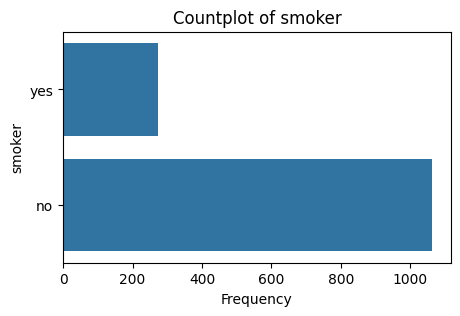

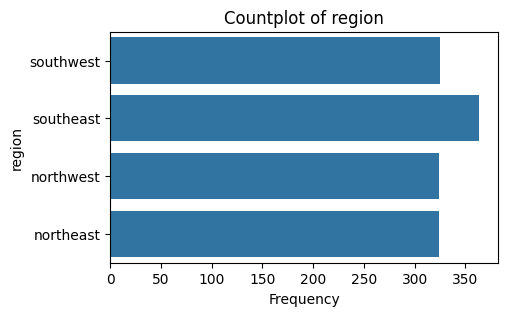

In [ ]:
# Question -> Write the Python Code for Countplots of all "object" columns
for col in df.select_dtypes(exclude = np.number):
  plt.figure(figsize = (5, 3))
  sns.countplot(df[col])
  plt.title(f'Countplot of {col}')
  plt.ylabel(col)
  plt.xlabel('Frequency')
  plt.show()

In [ ]:
'''
Conclusions ->
(1) From the "sex" column, we can conclude that we have
almost equal number of male and female customers.
(2) From the "smoker" column, we can say that we have
significantly higher number of non-smokers than smokers
(3) From the "region" column, we can say that we have
slightly higher number of customers from "southeast" region but
almost all the other regions have equal number of customers.
'''

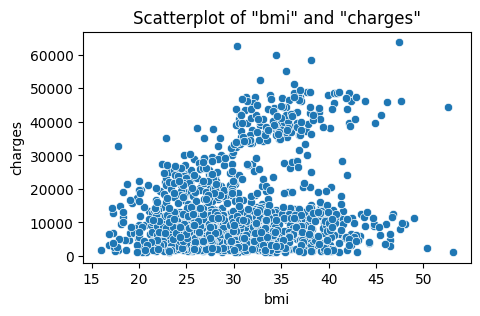

In [ ]:
# Scatterplot (bmi and charges)
plt.figure(figsize = (5, 3))
sns.scatterplot(x = 'bmi', y = 'charges', data = df)
plt.title('Scatterplot of "bmi" and "charges"')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

In [ ]:
# Conclusion -> "bmi" is not correlated with "charges"

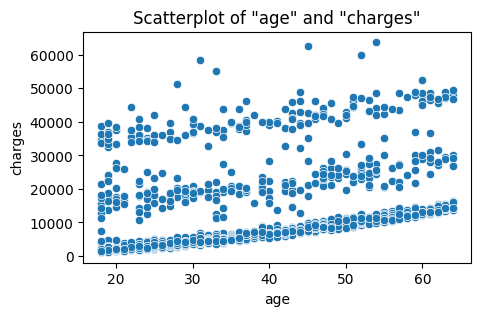

In [ ]:
# Scatterplot (age and charges)
plt.figure(figsize = (5, 3))
sns.scatterplot(x = 'age', y = 'charges', data = df)
plt.title('Scatterplot of "age" and "charges"')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

In [ ]:
# Conclusion -> "age" is not correlated with "charges"

In [ ]:
# Getting the list of columns
print('Columns :', df.columns)

Columns : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [ ]:
# Dealing with "binary" categorical values
df.loc[df['sex'] == 'female', 'sex'] = 0
df.loc[df['sex'] == 'male', 'sex'] = 1

df.loc[df['smoker'] == 'no', 'smoker'] = 0
df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
# We can also use map(), replace() functions to implement the above activity

In [ ]:
# Perform One-Hot Encoding for "region" column in the dataframe
df = pd.get_dummies(df, columns = ['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
# Replacing False with 0 and True with 1
df.replace({False : 0, True : 1}, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   int64  
 7   region_northwest  1337 non-null   int64  
 8   region_southeast  1337 non-null   int64  
 9   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 147.2 KB


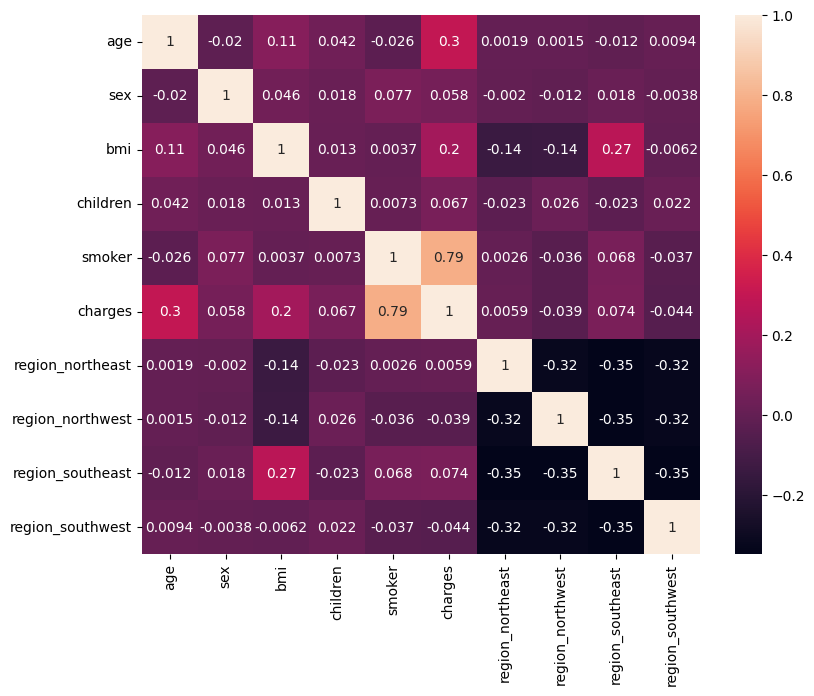

In [ ]:
# Correlation Analysis (Pearson's Correlation Coefficient)
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
'''
From the above column, if you observe, we can see the following conclusions ->
(1) "charges" are showing strong positive correlation with "smoker" column
(2) "charges" are showing weak positive correlation with "age" and "bmi" column
'''

In [ ]:
'''
We are going to create 2 models ->
(1) Simple Linear Regression -> charges ~ smoker
(2) Multiple Linear Regression -> charges ~ age + bmi + smoker
'''

In [ ]:
# Simple Linear Regression ->

In [ ]:
# Seperating input and output features
X = df[['smoker']]
y = df['charges']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Doubt
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [ ]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Taking predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.63
Testing R2 Score : 0.59


In [ ]:
'''
The difference between training and testing peformance is within 5% (which is acceptable)
But the performance is bad on training and testing data both (Underfitted)
'''

In [ ]:
# Multiple Linear Regression ->

In [ ]:
# Seperating input and output features
X = df[['smoker', 'age', 'bmi']]
y = df['charges']

# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Creating the model
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Taking predictions from the trained model on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import r2_score
print('Training R2 Score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.75
Testing R2 Score : 0.72


In [ ]:
'''
(1) Multiple Linear Regression has worked better than Simple Linear Regression model.
(2) The difference between training and testing peformance is within 5% (which is acceptable)
(3) The performance is okayish on training and testing data both.
'''

In [ ]:
'''
Now, to further increase the performance of the model (Model Optimization), we can do a few things ->
(1) Clip the outliers ("bmi")
(2) You can try and apply a few transformation (log, exp, square, cube, etc)
(3) Feature Engineering (Take help of subject matter experts)
'''

In [ ]:
# Tranformation Example ->
df['log_bmi'] = np.log(df['bmi'])
df['exp_bmi'] = np.exp(df['bmi'])
df['sqr_bmi'] = df['bmi'] ** 2
df['cube_bmi'] = df['bmi'] ** 3
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,log_bmi,exp_bmi,sqr_bmi,cube_bmi
0,19,0,27.900,0,1,16884.92400,0,0,0,1,3.328627,1.308628e+12,778.410000,21717.639000
1,18,1,33.770,1,0,1725.55230,0,0,1,0,3.519573,4.635800e+14,1140.412900,38511.743633
2,28,1,33.000,3,0,4449.46200,0,0,1,0,3.496508,2.146436e+14,1089.000000,35937.000000
3,33,1,22.705,0,0,21984.47061,0,1,0,0,3.122585,7.255314e+09,515.517025,11704.814053
4,32,1,28.880,0,0,3866.85520,0,1,0,0,3.363149,3.486781e+12,834.054400,24087.491072
